# N-gram language model

This is the first home work of the course NLP by Michael Elhadad. The work consist of 2 parts:

**First** part is an intro to language modeling, praticulary we will implement n-gram model, including data gathering and cleaning, date exploration, training the language model with the data and finaly evaluating the model with respect to Preplexity measure, on a test data, allowing examning the effect of the model size parameter on that measure.

Home work description: https://www.cs.bgu.ac.il/~elhadad/nlp19/hw1.html

That document consist with the first part

Agenda:

1) Language Modeling
* Gathering and Cleaning Up Data
* Gathering Basic Statistics
* n-gram Word Language Model
* Language Model Evaluation - {Perplexity Generating, Text from a Language Model}
* Character language model

**for part one we add all source files in .../src/ folder**

***

## 1.1.1 Gathering and Cleaning Up Data
We have implemented a method that recives URL list, and generates text files of clean tokens of a certain format, one for each of the given URL. If indeed the URL consist a page with large enough meaningful text, we may use the ouput file in as training data for a language model.

**Cleaning method functionality**<br>
* Replace all numbers by the token N
* Remove all punctuations
* Output all the text in lowercase
* single sentence per line
* Keep only the top-10K most frequent words in the dataset<br>
i.e. replacing the least frequent words by the token \< unk >

Below, we show a code that feches 3 URL addresses consisting each different text;<br>
Foreach we haveimplemnted above tasks;<br>
**Full output files are saved in ...\output_test_files\**

In [1]:
import sys
sys.path.append('..\src')
import NLP_HW01_Q1_pre_processing as preproc
import NLP_HW01_Q1_B_1_1_1

topFreqWords = 10_000
targetUrlList = [("the_crime_and_the_punishment", "http://www.gutenberg.org/files/2554/2554-h/2554-h.htm"),
                 ("ruth_scroll", "http://www.gutenberg.org/cache/epub/8008/pg8008.html"),
                 ("shakespeare_work", "https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt")]

# foreach URL generate ptb-like .text file
NLP_HW01_Q1_B_1_1_1.ptb_preprocess(targetUrlList, topFreqWords)

Fetching and preprocessing the text: 'the_crime_and_the_punishment'
getTextFromUrl: length =  1444059 charachters; type: = <class 'str'>; tagret URL: http://www.gutenberg.org/files/2554/2554-h/2554-h.htm
Last  3 sentences from C:\Users\Moshe\nlp01\NLP_HW01_submit_303111231_065908030\part1\output_text_files\the_crime_and_the_punishment.txt
 0: 'project gutenberg-tm ebooks are often created from several printed editions all of which are confirmed as public domain in the u.s. unless a copyright notice is included'
 1: 'thus we do not UNK keep ebooks in compliance with any particular paper UNK'
 2: 'most people start at our web site which has the main UNK search UNK http UNK this web site UNK information about project gutenberg-tm including how to make donations to the project gutenberg literary archive foundation how to help produce our new ebooks and how to UNK to our email UNK to hear about new ebooks'
writting preprocessed file to C:\Users\Moshe\nlp01\NLP_HW01_submit_303111231_06590803

***

## 1.1.2 Gathering Basic Statistics

We want to explore the dataset and gather some statistics about it. We collect and plot some information on the ptb.train.txt:

In [2]:
import sys
sys.path.append('..\src')
import NLP_HW01_Q1_B_1_1_2 as q112

q112.printStatistics("ptb.train.txt")

Number of words: 978726
The total number of characters 4129961
The total number of distinct words 9996
Number of tokens corresponding to the top-1000 most frequent words in the vocabulary 785187
The token/type ratio 97.91176470588235
The average number and standard deviation of characters per token 4.2197315694075765, 2.705652415851888
Number of distinct n-grams (of words) that appear in the dataset for n=2: 277419
Number of distinct n-grams (of words) that appear in the dataset for n=3: 598666
Number of distinct n-grams (of words) that appear in the dataset for n=4: 754993
Number of distinct n-grams (of chars) that appear in the dataset for n=1: 50
Number of distinct n-grams (of chars) that appear in the dataset for n=2: 778
Number of distinct n-grams (of chars) that appear in the dataset for n=3: 6304
Number of distinct n-grams (of chars) that appear in the dataset for n=4: 29620
Number of distinct n-grams (of chars) that appear in the dataset for n=5: 106312
Number of distinct n-gra

In addition, we want to verify that the Penn Treebank follows the power law distributions. Namely, the log-frequency against the log-rank is nearly linear

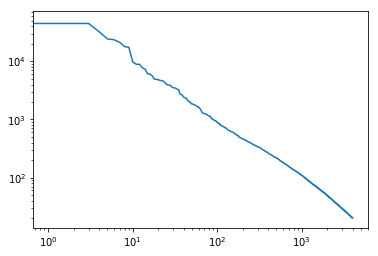

In [3]:
q112.plotLoglog("ptb.train.txt")

## 1.2 n-gram Word Language Model

**A language model**, is a data structure that models statistical dependency between words in the lenguage it models.
Given a seiries of word token (the condition) it should output it's estimation of the next work, in the form of distribution (conditional probabilities); 
There are few approaches how to achive statistical dependency; n-gram model takes the MLE approach, in practice that means to count the ocurances of a word after it's preceding history. the count is done over training data of text, hopefully large enough to capture the 'real' relation between words in the language;

Our implementation is based on Yoav's Goldberg implementation for an n-gram model for charachters, and adapted to words:


In [7]:
def train_word_lm(fname, order=2):
    # assumption: receive a file with line delimiter line feed for sentences

    with open(fname) as f:
        data = f.read()

    # pre-process ptb-like text
    preprocessData = preproc.preProcessPtb(data, order)

    # split to list of tokens by space delimiter
    words = nltk.word_tokenize(preprocessData)

    # count instances of occurrences of order-th word conditioned on order-1 history
    lm = defaultdict(Counter)
    i = 0
    while i < len(words)-(order+1):
        history, word = contextDelimiter.join(words[i:i+(order-1)]), words[i+(order-1)]
        lm[history][word] += 1
        i = i+1

    # normalization
    def normalize(counter):
        # assume to receive a Counter object
        norm = float(sum(counter.values()))
        return [(word, count/norm) for word, count in counter.items()]
    normLm = {history: normalize(count) for history, count in lm.items()}
    return normLm

### 1.2.1 Data structure properties
size of the Dictionary data structure is the size of the key-value tuples it holds which correspond to observed $n$-word tuples in the trained text; for a text consisting $|V|$ number of words possible number of $n$-word tuples is $|V|^n$; that number is by far greater then the number of distinct observed $n$-word tuples; That is due to two main reasons, the property of the language, not all sequances are equally likely (clearly), and the second reason is the size of the training text data, and its representation of the actual language word distribution;

#### Data structure used in the model
The data structure in the implemented model is a dictionary; a Dictionary is a hash map, given a (unique) key it can access the key related value; in our case:

- key: type string; consisting the concetenation of the history; also related as 'context'
- value: list of tuples, each tuple consist word and it's probability;

access (insert, modify, delete) of the value is done in an O(1) with respect to the size of the data structure;<br>

#### suggested Interface
with respect to language model purpose, we can think of several tasks it may be used to (e.g. model selection and research (perplexity); word completion (next_word_list); etc) therefore we would like to present the following methods available in the interface:

- train_lm(train_text_string: str)<br>
method that initialize the language model with respect to a given train data.
- preprlexity(test_text_string: str)<br>
method that rates the model trained on the training data
- choose_random_word(context: str)<br>
returns a random word with respect to it's probability
- prob(word: str, context: str)<br>
returns the conditional probability of the given word given the given context
- next_word_list(context:str, list_max_size: int, min_prob_cut_down: float)<br>
returns the conditional probability of words given the context, list is truncated by 2 parameters

### 1.2.2 data structure size

- worst case: $|V|^n$<br>
as stated in previous section, marking size of observed word set as $|V|$, and the order of the n-gram as $n$, clearly the number of $n$-tuple words is $|V|^n$
- expected data structure size<br>
for a text size $N$ (in our ptb example 10_000), is all $n$-tuples are distincs, we may expect $N-n$ distinct $n$-tuples; the expected number is much lower then the possible one due to the sparsity of the language, and for the evidance we can take the results of clause 1.1.2 in the following table

| order | max possible | actual found<br>
| $n=2$ | $(10^4)^2 $  | 277419<br>
| $n=3$ | $(10^4)^3 $  | 598666<br>
| $n=4$ | $(10^4)^4 $  | 754993<br>


***

## 1.3 Language Model Evaluation

We would like to have a score fort the model we are construcing with respect to the task under consideration. For that purpopse we have the preplexity measure. In that section we implement perplexity in several ways to observe how changing the model gives us a different perplexity value.

### 1.3.1 Language Model Evaluation - perplexity

### 1.3.1.1 Perplexity implementation
Below is our implementation for preplexity, with implemented back-off;<br>
that implementation returns perplexity value for order 2: **608.88**

(the plot of clause 1.3.3 consist that output as well the values for orders 3..20)

In [14]:
def removeTail(inStr, delimiter):
    splitStrList = inStr.split(delimiter)
    splitStrList = splitStrList[1:]
    outStr = delimiter.join(splitStrList)
    return outStr

def prob(token: str, context: str, lmList: [str], order: int) -> float:
    lm = lmList[order - 1]
    if order == 1:
        # base case for back-off
        lst = lm['']
        for word, wordProb in lst:
            if word == token:
                return wordProb
            else:
                # print("Warning: hardcoded smoothing was done, word %s not found" % word)
                return 0.0000001
    if context in lm:
        # order > 1
        lst = lm[context]
        for word, wordProb in lst:
            if word == token:
                # found conditional probability
                return wordProb
    # back-off
    return prob(token, removeTail(context,contextDelimiter), lmList[0:order-1], order-1)

def logprob(p):
    return math.log(p, 2)

def entropy(text, order, lmList):
    e = 0.0
    words_list = nltk.word_tokenize(text)

    for i in range(order - 1, len(words_list)):
        context = contextDelimiter.join(words_list[i - order + 1:i])
        token = words_list[i]
        probability = prob(token, context, lmList, order)
        e -= logprob(probability)
    return e / float(len(words_list) - (order - 1))

def perplexity(text, order, lmList):
    preprocessText = preproc.preProcessPtb(text, order)
    return pow(2.0, entropy(preprocessText, order, lmList))

### 1.3.1.2 Using Lidstone smoothing

We now change our model to use a different estimator than the Maximum Likelihood Estimator (MLE) count-based estimator. We'll use the Lidstone probability for a variety of hyper-parameter gamma (0 < gamma < 1)

$$
Pr(w_n | w_1...w_{n-1}) = \frac{Count(W_1...W_n) + \gamma}{Count(W_1...W_{n-1})+\gamma |Dictionary(n)|}
$$

where  $|Dictionary(n)| = \sum_{w_1,...,w_{n-1} \in |V|^{n-1}} Count(w_1,...,w_{n-1})$ 

#### smoothin parameter $\gamma$ effect on perplexity
From Lidstone probability calculationit follows:
- $\gamma$ increases: distribution tends to be uniform distribution, but there is no use of setting a higher value then 1 as it represent a single count for non seen instances; 
- $\gamma$ decreases towards 0, its effect on the probability term diminishes, and we get closer to the MLE (when setting 0 cancelling the smoothing effect).
Therefore, per fixed training data and language model order $n$ we expect to have minimum between 0 to 1.

#### language order model $n$ effect on perplexity
 - sufficient trainig data size<br>
Increasing the model order sould gice it more power ,but that is only to a certain n-value (the training-data-size optimal), after which the order of the model would be too large as the n-gams would be very sparse, and almost uniform. smoothing cannot fix (by much) that situation and a smaller order should be chosen<br>
 - small training data size<br>
That case we may be finding the optimum quite soon since the training data may not have enough n-gram types in it to generate estimations; we may also find that n=2 is optimal;

In [1]:
def LidstoneProb(gamma,word, context ,lm,vocablarySize):
    if context in lm:
        sum_of_context = sum(lm[context].values())
        div = sum_of_context+vocablarySize * gamma
        if word in lm[context]:
            word_prob = float(lm[context][word])
        else:
            word_prob = 0
    else:
        word_prob = 0
        div = vocablarySize * gamma
    return float(word_prob + gamma) / div

We want to maximize th model for $\gamma$ and n, so we measure the perplexity for different values. 

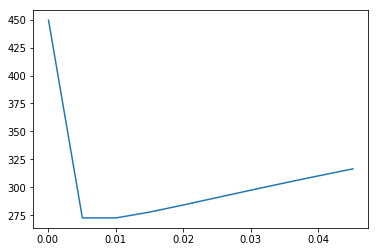

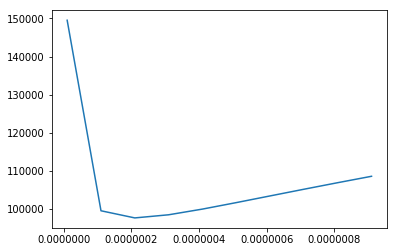

In [6]:
import sys, os
sys.path.append('..\src')
import NLP_HW01_Q1_language_model as lm

lm.plotLidstoneProbGammaGraph3()
lm.plotLidstoneProbGammaGraph2()

conclusion from above graphs: **<n=2; $\gamma$~0.007> are optimal parameters**<br>

Explenation:<br>
We present the $\gamma$ parameter search on n=2 (lower), n=3 (upper) and we found the minimum point for $\gamma$ in both n values;<br>
as stated before, search is convex in both parameters, then if we see n=3 give higher values of perplexity in the $\gamma$ optimal value, we conclude we should not search any higher values of order n for the model;

### 1.3.1.3 Perplexity measure of increasing values of n-gram model - back-off
Since back off returns to smaller model only when it has 0 value probability estimation, we infact expect only an improvment when taking a higher model, but the improvments are expected to decrease in magnitudeas we proceed to higher model vause, as higher order models are more and more sparse;

We plot below the perplexity of incresing order of model;
- smoothing used: **back off** <br> 
We used back-off for 0 values of condition probability of the $order-1$ history context
- order measured: {2..20}

**results analysis:**
Indeed we see that as the order of model increases, the value of the perplexity improves (decreases) and the rate of improvment is indeed decreasesas expected

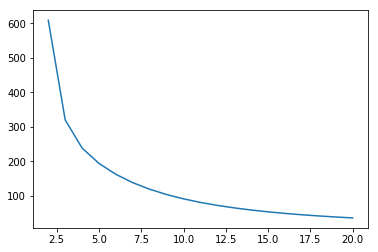

In [4]:
import sys, os
sys.path.append('..\src')
import NLP_HW01_Q1_B_1_3


# train/ test files paths and parameters
scriptPath = os.path.dirname(os.path.realpath('__file__'))
scriptPathPrev = os.path.split(scriptPath)[0]

relTrainFilePath = "\\input_text_files\\ptb.train.txt"
trainPath = scriptPathPrev + relTrainFilePath
relTestFilePath = "\\input_text_files\\ptb.test.txt"
testPath = scriptPathPrev + relTestFilePath
maxOrder = 20

# main code
NLP_HW01_Q1_B_1_3.testPerplexity(trainPath, testPath, maxOrder)

### 1.3.1.4  optimal model score

running on ptb files we have 2 methods optimal perplexity values:<br>
- back off smoothing: <order=20> perplexity ~  36 <br>
- lidstone smoothing: <order=02, $\gamma$~0.007> perplexity ~ 275 <br>

[Note] In backoff method we can infact improve the model but it also come on the expense of runtime of training, and space of the language model, while the improvment is not bery significant.